In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download Data

In [2]:
import os
import gdown

folder = "data"
os.makedirs(folder, exist_ok=True)

output = os.path.join(folder, "cleaned_df.csv")
url = "https://drive.google.com/uc?id=1NnlFIt5zL8i6vO5BuxQHhPTGprGn0Rbo"

if not os.path.exists(output):
    print("File not found. Downloading...")
    gdown.download(url, output, quiet=False)
    print("Download completed!")
else:
    print("File already exists. Skip downloading.")

File already exists. Skip downloading.


In [3]:
cleaned_df = pd.read_csv(output)
cleaned_df

,ticket_id,comment,coords,district,timestamp,count_reopen,count_reopen_log
0,2022-7ZTKJV,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อ...,"100.53764,13.70716",สาทร,2022-01-02 10:53:25.580723+00:00,0,0.0
1,2022-E24G76,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,"100.52674,13.70950",สาทร,2022-01-14 01:17:23.873811+00:00,0,0.0
2,2022-C37YCA,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,"100.52678,13.70967",สาทร,2022-01-14 01:18:57.194155+00:00,0,0.0
3,2022-HB7Z8A,ทางเท้าช่วง จันทน์ 18/5 สภาพโอเค แต่ฝาท่อเก่าแ...,"100.53025,13.70566",สาทร,2022-01-14 01:32:03.715912+00:00,0,0.0
4,2022-8EW3HK,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,"100.65816,13.68814",ประเวศ,2022-01-15 12:52:39.805944+00:00,0,0.0
...,...,...,...,...,...,...,...
157758,PTLMHD,มีการตั้งเวที ร้องเพลง ส่งเสียงดัง โดยจุดเกิดเ...,"100.56189,13.73713",วัฒนา,2022-12-31 20:03:10.221437+00:00,0,0.0
157759,MHFY48,ซอย (ไม่ทราบชื่อ) ถนนมังกร เขตป้อมปราบศัตรูพ่า...,"100.51280,13.74480",ป้อมปราบศัตรูพ่าย,2022-12-31 20:37:37.226395+00:00,0,0.0
157760,NNFVLK,เปิดเพลงเสียงดังตั้งแต่ตอนเช้าจนถึงตีสี่ยังไม่...,"100.42785,13.68924",ภาษีเจริญ,2022-12-31 20:52:02.074206+00:00,0,0.0
157761,6LZVNJ,เสียงดังรบกวนรำคาน นอนไม่ได้ ผู้แจ้งไม่แน่ใจว่...,"100.56181,13.73713",วัฒนา,2022-12-31 21:28:10.060293+00:00,0,0.0


# Coors Preparation

In [4]:
import geopandas as gpd
from shapely.geometry import Point

In [5]:
cleaned_df[['lng', 'lat']] = cleaned_df['coords'].str.split(',', expand=True).astype(float)
geometry = [Point(xy) for xy in zip(cleaned_df['lng'], cleaned_df['lat'])]
cleaned_df = gpd.GeoDataFrame(cleaned_df, geometry=geometry, crs="EPSG:4326")

# Drop coords
cleaned_df = cleaned_df.drop(columns=["coords"], errors='ignore')
cleaned_df

,ticket_id,comment,district,timestamp,count_reopen,count_reopen_log,lng,lat,geometry
0,2022-7ZTKJV,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อ...,สาทร,2022-01-02 10:53:25.580723+00:00,0,0.0,100.53764,13.70716,POINT (100.53764 13.70716)
1,2022-E24G76,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,สาทร,2022-01-14 01:17:23.873811+00:00,0,0.0,100.52674,13.70950,POINT (100.52674 13.7095)
2,2022-C37YCA,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,สาทร,2022-01-14 01:18:57.194155+00:00,0,0.0,100.52678,13.70967,POINT (100.52678 13.70967)
3,2022-HB7Z8A,ทางเท้าช่วง จันทน์ 18/5 สภาพโอเค แต่ฝาท่อเก่าแ...,สาทร,2022-01-14 01:32:03.715912+00:00,0,0.0,100.53025,13.70566,POINT (100.53025 13.70566)
4,2022-8EW3HK,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,ประเวศ,2022-01-15 12:52:39.805944+00:00,0,0.0,100.65816,13.68814,POINT (100.65816 13.68814)
...,...,...,...,...,...,...,...,...,...
157758,PTLMHD,มีการตั้งเวที ร้องเพลง ส่งเสียงดัง โดยจุดเกิดเ...,วัฒนา,2022-12-31 20:03:10.221437+00:00,0,0.0,100.56189,13.73713,POINT (100.56189 13.73713)
157759,MHFY48,ซอย (ไม่ทราบชื่อ) ถนนมังกร เขตป้อมปราบศัตรูพ่า...,ป้อมปราบศัตรูพ่าย,2022-12-31 20:37:37.226395+00:00,0,0.0,100.51280,13.74480,POINT (100.5128 13.7448)
157760,NNFVLK,เปิดเพลงเสียงดังตั้งแต่ตอนเช้าจนถึงตีสี่ยังไม่...,ภาษีเจริญ,2022-12-31 20:52:02.074206+00:00,0,0.0,100.42785,13.68924,POINT (100.42785 13.68924)
157761,6LZVNJ,เสียงดังรบกวนรำคาน นอนไม่ได้ ผู้แจ้งไม่แน่ใจว่...,วัฒนา,2022-12-31 21:28:10.060293+00:00,0,0.0,100.56181,13.73713,POINT (100.56181 13.73713)


# Web scraping
impact_to_public

In [6]:
import requests

In [7]:
# Department Store
url_department = "https://data.bangkok.go.th/dataset/d8f814ac-cbaf-43c3-9576-f533b2554776/resource/438101c3-5535-4fe2-bc5e-83aa73703d4a/download/department_store.csv"
df_department = pd.read_csv(url_department)
print("Columns:", df_department.columns)
print("Examples:")
print(df_department.head())

Columns: Index(['id_depart', 'name', 'address', 'tel', 'time', 'dcode', 'dname', 'lat',
       'lng'],
      dtype='object')
Examples:
   id_depart                                        name  \
0          2  บิ๊กซี สาขาสุขาภิบาล 3 สาขา 2 (เอ็กซ์ตร้า)   
1          3                          โลตัส จรัญสนิทวงศ์   
2          4                             โลตัส แจ้งวัฒนะ   
3          5                           โลตัส ซีคอนสแควร์   
4          6                                 โลตัส บางแค   

                                             address          tel  \
0  643 ถนน รามคำแหง แขวงหัวหมาก เขตบางกะปิ กรุงเท...  0 2735 3062   
1  244 ซอย จรัญสนิทวงศ์ 79 แขวงบางพลัด เขตบางพลัด...  0 2434 7575   
2  300 ม.1 ถ.แจ้งวัฒนะ แขวงทุ่งสองห้อง เขตหลักสี่...  0 2990 7580   
3  904/2 ม.6 ถ.ศรีนครินทร์ แขวงหนองบอน เขตประเวศ ...  0 2721 9118   
4  266 ถ. เพชรเกษม แขวงบางแคเหนือ เขตบางแค กทม. 1...  0 2804 4837   

                      time  dcode    dname        lat         lng  
0   เปิดเวลา 09:00-21

In [8]:
# Community
url_community = "https://cpudgiapp.bangkok.go.th/arcgis/rest/services/Community/Service_Community_Public/MapServer/0/query"
params = {
    "where": "1=1",
    "outFields": "*",
    "f": "json",
    "returnGeometry": "true"
}

data_community = requests.get(url_community, params=params).json()
df_community = pd.DataFrame([f["attributes"] for f in data_community["features"]])
print("Columns:", df_community.columns)
print("Examples:")
print(df_community.head())

Columns: Index(['OBJECTID', 'CMT_TYPE', 'DNAME', 'SNAME', 'NHOUSE', 'RAI', 'NGAN', 'WA',
       'HOUSEHOLD', 'MALE', 'FEMALE', 'ADDRESS', 'NORTH_BND', 'SOUTH_BND',
       'EAST_BND', 'WEST_BND', 'REMARK', 'LON', 'LAT',
       'COMMU_ADMIN_COMMU_BND_FINAL_CM', 'COMMU_ADMIN_COMMU_BND_FINAL__1',
       'COMMU_ADMIN_COMMU_BND_FINAL_DC', 'CMT_ID', 'CMT_NAME', 'STATUS',
       'ORIG_FID', 'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER',
       'LAST_EDITED_DATE', 'ESTABLISHED'],
      dtype='object')
Examples:
   OBJECTID       CMT_TYPE    DNAME       SNAME  NHOUSE     RAI  NGAN   WA  \
0        52  ชุมชนชานเมือง  หนองจอก  กระทุ่มราย   128.0   400.0   0.0  0.0   
1        53     ชุมชนเมือง  หนองจอก  กระทุ่มราย   104.0    20.0   0.0  0.0   
2        54  ชุมชนชานเมือง  หนองจอก  กระทุ่มราย   111.0   300.0   0.0  0.0   
3        55  ชุมชนชานเมือง  หนองจอก  กระทุ่มราย   142.0  1200.0   0.0  0.0   
4        56     ชุมชนเมือง  หนองจอก  กระทุ่มราย   262.0    20.0   0.0  0.0   

   HOUSEHOLD   MAL

In [9]:
# School
url_school = "https://bmagis.bangkok.go.th/arcgis/rest/services/riskbkk/RISK_ADMIN_bma_school/FeatureServer/0/query"
data_school = requests.get(url_school, params=params).json()
df_school = pd.DataFrame([f["attributes"] for f in data_school["features"]])
print("Columns:", df_school.columns)
print("Examples:")
print(df_school.head())

Columns: Index(['OBJECTID', 'TYPE', 'NAME', 'DCODE', 'ADDRESS', 'X', 'Y', 'GLOBALID',
       'CREATED_USER', 'CREATED_DATE', 'LAST_EDITED_USER', 'LAST_EDITED_DATE'],
      dtype='object')
Examples:
   OBJECTID TYPE                               NAME DCODE  \
0         1    1               โรงเรียนวัดใหม่อมตรส  1001   
1         2    3  โรงเรียนวัดหนองจอก (ภักดีนรเศรษฐ)  1003   
2         3    2            โรงเรียนสุเหร่าหะยีมินา  1003   
3         4    1            โรงเรียนสุเหร่าบ้านเกาะ  1003   
4         5    1                โรงเรียนลำบุหรี่พวง  1003   

                                           ADDRESS           X            Y  \
0                 132 ถ.สามเสน แขวงพานถม เขตพระนคร  662324.254  1522243.929   
1  18 หมู่ 2 ถ.เลียบวารี แขวงกระทุ่มราย เขตหนองจอก  701051.281  1532706.770   
2  หมู่ 4 ถ.สังฆสันติสุข แขวงกระทุ่มราย เขตหนองจอก  702036.597  1532511.740   
3                 14 หมู่ 1 แขวงหนองจอก เขตหนองจอก  703531.964  1534628.348   
4       หมู่ 14 ลำบุหรี่พวง แขวงคลองสิบ 

In [10]:
# Hospital
url_hospital = "https://bmagis.bangkok.go.th/arcgis/rest/services/riskbkk/RISK_ADMIN_Hospital/FeatureServer/0/query"
data_hospital = requests.get(url_hospital, params=params).json()
df_hospital = pd.DataFrame([f["attributes"] for f in data_hospital["features"]])
print("Columns:", df_hospital.columns)
print("Examples:")
print(df_hospital.head())


Columns: Index(['OBJECTID', 'NAME', 'DCODE', 'ADDRESS', 'TEL', 'NUM_BED', 'X', 'Y'], dtype='object')
Examples:
   OBJECTID                           NAME DCODE  \
0         1        โรงพยาบาลภูมิพลอดุลยเดช  1042   
1         2  โรงพยาบาลและสถาบันประสาทวิทยา  1037   
2         3         โรงพยาบาลพระมงกุฏเกล้า  1037   
3         4               โรงพยาบาลราชวิถี  1037   
4         5                  โรงพยาบาลสงฆ์  1037   

                                             ADDRESS                 TEL  \
0    171 ถ.พหลโยธิน แขวงคลองถนน เขตสายไหม  กทม.10220       0 - 2534-7000   
1       312 ถ. ราชวิถี แขวงทุ่งพญาไท เขตราชเทวี กทม.     0 - 2246 - 9254   
2       315 ถ.ราชวิถี ทุ่งพญาไท เขตราชเทวี กทม.10400  0 - 2246 - 1400-28   
3       2 ถ.พญาไท แขวงทุ่งพญาไท เขตราชเทวี กทม.10400   0 - 2248 - 3213-4   
4  445 ถ.ศรีอยุธยา แขวงทุ่งพญาไท เขตราชเทวี กทม.1...     0 - 2247 - 1655   

   NUM_BED           X            Y  
0      700  674848.512  1538263.349  
1      350  665118.241  1522693.716  
2    

In [11]:
def clean_and_convert_to_gdf(df, col_map, place_type, drop_zero=True):
    # Step 1: select & rename
    df_clean = df[[col_map["name"], col_map["lat"], col_map["lng"]]].copy()
    df_clean.columns = ["name", "lat", "lng"]

    # Step 2: clean name
    df_clean["name"] = df_clean["name"].astype(str).str.strip()
    df_clean = df_clean[df_clean["name"] != ""].dropna(subset=["name"])

    # Step 3: convert numeric
    df_clean["lat"] = pd.to_numeric(df_clean["lat"], errors="coerce")
    df_clean["lng"] = pd.to_numeric(df_clean["lng"], errors="coerce")

    # Step 4: drop missing / zero
    df_clean = df_clean.dropna(subset=["lat", "lng"])
    if drop_zero:
        df_clean = df_clean[(df_clean["lat"] != 0) & (df_clean["lng"] != 0)]

    # Step 5: detect coordinate system
    max_lat = df_clean["lat"].max()

    if max_lat > 1000:
        # เป็น UTM (ไทยส่วนใหญ่ Zone 47N หรือ 48N)
        print(f"[{place_type}] Detected UTM coordinates → converting to WGS84...")

        gdf = gpd.GeoDataFrame(
            df_clean,
            geometry=[Point(xy) for xy in zip(df_clean["lng"], df_clean["lat"])],
            crs="EPSG:32647"  # UTM Zone 47N (ใช้กับกรุงเทพ)
        )
        # convert to lat/lng
        gdf = gdf.to_crs("EPSG:4326")

        # extract back lat/lng
        gdf["lng"] = gdf.geometry.x
        gdf["lat"] = gdf.geometry.y

    else:
        # lat/lng was normal
        gdf = gpd.GeoDataFrame(
            df_clean,
            geometry=[Point(xy) for xy in zip(df_clean["lng"], df_clean["lat"])],
            crs="EPSG:4326"
        )

    gdf["type"] = place_type
    return gdf.reset_index(drop=True)

In [12]:
column_mapping = {
    "department": {"name": "name", "lat": "lat", "lng": "lng"},
    "community":  {"name": "CMT_NAME", "lat": "LAT",  "lng": "LON"},
    "school":     {"name": "NAME",     "lat": "Y",    "lng": "X"},
    "hospital":   {"name": "NAME",     "lat": "Y",    "lng": "X"},
}


In [13]:
gdf_department = clean_and_convert_to_gdf(
    df_department, column_mapping["department"], "department"
)

gdf_community = clean_and_convert_to_gdf(
    df_community,  column_mapping["community"],  "community"
)

gdf_school = clean_and_convert_to_gdf(
    df_school,     column_mapping["school"],     "school"
)

gdf_hospital = clean_and_convert_to_gdf(
    df_hospital,   column_mapping["hospital"],   "hospital"
)


[school] Detected UTM coordinates → converting to WGS84...
[hospital] Detected UTM coordinates → converting to WGS84...


In [14]:
gdf_public_place = pd.concat(
    [gdf_department, gdf_community, gdf_school, gdf_hospital],
    ignore_index=True
)

print("Total public places:", len(gdf_public_place))
display(gdf_public_place.head())


Total public places: 1718


,name,lat,lng,geometry,type
0,บิ๊กซี สาขาสุขาภิบาล 3 สาขา 2 (เอ็กซ์ตร้า),13.770855,100.658397,POINT (100.6584 13.77085),department
1,โลตัส จรัญสนิทวงศ์,13.787928,100.502385,POINT (100.50238 13.78793),department
2,โลตัส แจ้งวัฒนะ,13.895829,100.556153,POINT (100.55615 13.89583),department
3,โลตัส ซีคอนสแควร์,13.692540,100.648029,POINT (100.64803 13.69254),department
4,โลตัส บางแค,13.712653,100.418968,POINT (100.41897 13.71265),department


In [15]:
display(gdf_public_place.sample(5))

,name,lat,lng,geometry,type
1028,ปทุมทิพย์,13.814119,100.529160,POINT (100.52916 13.81412),community
795,เคหะธนบุรี 1 ส่วน 5 โซน 1,13.644684,100.418150,POINT (100.41815 13.64468),community
1549,โรงเรียนประสานสามัคคี (บ้านทับยาว),13.731837,100.837768,POINT (100.83777 13.73184),school
529,ข้างโรงเรียนพณิชยการราชดำเนิน,13.742737,100.483852,POINT (100.48385 13.74274),community
640,หมู่บ้านปรีชา 11 หมู่ 3,13.813691,100.712670,POINT (100.71267 13.81369),community


In [16]:
copy_cleaned_df = cleaned_df.copy()
copy_gdf_public_place = gdf_public_place.copy()

In [17]:
copy_gdf_public_place

,name,lat,lng,geometry,type
0,บิ๊กซี สาขาสุขาภิบาล 3 สาขา 2 (เอ็กซ์ตร้า),13.770855,100.658397,POINT (100.6584 13.77085),department
1,โลตัส จรัญสนิทวงศ์,13.787928,100.502385,POINT (100.50238 13.78793),department
2,โลตัส แจ้งวัฒนะ,13.895829,100.556153,POINT (100.55615 13.89583),department
3,โลตัส ซีคอนสแควร์,13.692540,100.648029,POINT (100.64803 13.69254),department
4,โลตัส บางแค,13.712653,100.418968,POINT (100.41897 13.71265),department
...,...,...,...,...,...
1713,โรงพยาบาลวัฒโนสถ,13.756059,100.581966,POINT (100.58197 13.75606),hospital
1714,สถานพยาบาลเวชกรรม กรุงเทพอินเตอร์เนชั่นแนล,13.744905,100.584813,POINT (100.58481 13.74491),hospital
1715,โรงพยาบาลลาดพร้าว,13.778555,100.623888,POINT (100.62389 13.77855),hospital
1716,โรงพยาบาลการแพทย์วิชัยยุทธ,13.783266,100.533685,POINT (100.53368 13.78327),hospital


In [18]:
copy_cleaned_df

,ticket_id,comment,district,timestamp,count_reopen,count_reopen_log,lng,lat,geometry
0,2022-7ZTKJV,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อ...,สาทร,2022-01-02 10:53:25.580723+00:00,0,0.0,100.53764,13.70716,POINT (100.53764 13.70716)
1,2022-E24G76,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,สาทร,2022-01-14 01:17:23.873811+00:00,0,0.0,100.52674,13.70950,POINT (100.52674 13.7095)
2,2022-C37YCA,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,สาทร,2022-01-14 01:18:57.194155+00:00,0,0.0,100.52678,13.70967,POINT (100.52678 13.70967)
3,2022-HB7Z8A,ทางเท้าช่วง จันทน์ 18/5 สภาพโอเค แต่ฝาท่อเก่าแ...,สาทร,2022-01-14 01:32:03.715912+00:00,0,0.0,100.53025,13.70566,POINT (100.53025 13.70566)
4,2022-8EW3HK,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,ประเวศ,2022-01-15 12:52:39.805944+00:00,0,0.0,100.65816,13.68814,POINT (100.65816 13.68814)
...,...,...,...,...,...,...,...,...,...
157758,PTLMHD,มีการตั้งเวที ร้องเพลง ส่งเสียงดัง โดยจุดเกิดเ...,วัฒนา,2022-12-31 20:03:10.221437+00:00,0,0.0,100.56189,13.73713,POINT (100.56189 13.73713)
157759,MHFY48,ซอย (ไม่ทราบชื่อ) ถนนมังกร เขตป้อมปราบศัตรูพ่า...,ป้อมปราบศัตรูพ่าย,2022-12-31 20:37:37.226395+00:00,0,0.0,100.51280,13.74480,POINT (100.5128 13.7448)
157760,NNFVLK,เปิดเพลงเสียงดังตั้งแต่ตอนเช้าจนถึงตีสี่ยังไม่...,ภาษีเจริญ,2022-12-31 20:52:02.074206+00:00,0,0.0,100.42785,13.68924,POINT (100.42785 13.68924)
157761,6LZVNJ,เสียงดังรบกวนรำคาน นอนไม่ได้ ผู้แจ้งไม่แน่ใจว่...,วัฒนา,2022-12-31 21:28:10.060293+00:00,0,0.0,100.56181,13.73713,POINT (100.56181 13.73713)


In [19]:
def compute_public_impact(
    gdf_cases,
    gdf_places,
    max_distance=1000,
    weights={"school":0.3,"department":0.2,"community":0.2,"hospital":0.3}
):

    # STEP 0 — convert to meters
    gdf_cases_m  = gdf_cases.to_crs("EPSG:32647")
    gdf_places_m = gdf_places.to_crs("EPSG:32647")

    place_types = list(weights.keys())

    # initialize distance lists
    for t in place_types:
        gdf_cases_m[f"{t}_distances"] = [[] for _ in range(len(gdf_cases_m))]

    # STEP 1 — compute distances
    for t in place_types:

        places_t = gdf_places_m[gdf_places_m["type"] == t]
        if places_t.empty:
            continue

        sindex = places_t.sindex

        for idx, case_geom in gdf_cases_m.geometry.items():

            # หา candidate ด้วย buffer
            possible_idx = list(
                sindex.query(case_geom.buffer(max_distance))
            )

            if not possible_idx:
                continue

            # คำนวณระยะจริง
            dists = [
                case_geom.distance(places_t.iloc[i].geometry)
                for i in possible_idx
            ]

            # เก็บเฉพาะที่ระยะ ≤ max_distance
            dists = [d for d in dists if d <= max_distance]

            gdf_cases_m.at[idx, f"{t}_distances"] = dists

    # STEP 2 — inverse distance
    for t in place_types:
        gdf_cases_m[f"{t}_point_scores"] = gdf_cases_m[f"{t}_distances"].apply(
            lambda lst: [max(0, max_distance - d) for d in lst] if lst else []
        )

    # STEP 3 — raw score (log1p)
    for t in place_types:
        gdf_cases_m[f"{t}_raw_score"] = gdf_cases_m[f"{t}_point_scores"].apply(
            lambda lst: np.log1p(sum(lst)) if lst else 0
        )

    # STEP 4 — normalize 0–100
    for t in place_types:
        max_val = gdf_cases_m[f"{t}_raw_score"].max()
        if max_val > 0:
            gdf_cases_m[f"{t}_score"] = gdf_cases_m[f"{t}_raw_score"] / max_val * 100
        else:
            gdf_cases_m[f"{t}_score"] = 0

    # STEP 5 — weighted sum
    gdf_cases_m["public_impact"] = 0
    for t, w in weights.items():
        gdf_cases_m["public_impact"] += gdf_cases_m[f"{t}_score"] * w

    # STEP 6 — drop temp cols
    temp_cols = [c for c in gdf_cases_m.columns
                 if any(x in c for x in ["_distances","_point_scores","_raw_score","_score"])
                 and c != "public_impact"]

    gdf_cases_m = gdf_cases_m.drop(columns=temp_cols)

    # STEP 7 — convert back to WGS84
    gdf_final = gdf_cases_m.to_crs("EPSG:4326")

    return gdf_final

In [20]:
gdf_public_impact = compute_public_impact(copy_cleaned_df, copy_gdf_public_place)


In [21]:
gdf_public_impact.sort_values("public_impact", ascending=False).head()


,ticket_id,comment,district,timestamp,count_reopen,count_reopen_log,lng,lat,geometry,public_impact
153327,2022-7YPYCM,ตั้งบนทางเท้า,ราษฎร์บูรณะ,2022-12-16 05:06:53.874698+00:00,0,0.0,100.50142,13.67750,POINT (100.50142 13.6775),87.878537
32667,2022-B4ELTG,ผมเกรงว่ามันจะหลุดแล้วปลิวลงถนนจะเกิดอุบัติเหต...,ราษฎร์บูรณะ,2022-06-21 02:38:08.112234+00:00,0,0.0,100.50142,13.67750,POINT (100.50142 13.6775),87.878537
147319,2022-9FBMNH,ช่วยสำรวจทางเท้าทั้งเส้นตั้งแต่แยกราษฎร์พัฒนาถ...,ราษฎร์บูรณะ,2022-11-27 07:37:02.627934+00:00,0,0.0,100.50142,13.67750,POINT (100.50142 13.6775),87.878537
154067,2022-N3YTY4,เจ้าของตลาดปล่อยให้ผู้เช่าค้าขาย จับกลุ่มมั่วส...,ราษฎร์บูรณะ,2022-12-18 15:03:06.939865+00:00,0,0.0,100.50005,13.67836,POINT (100.50005 13.67836),87.853389
83374,2022-79YXDV,มีกลุ่มคนจับกลุ่มมั่วสุม ส่งเสียงดังสร้างความเ...,ราษฎร์บูรณะ,2022-07-26 15:16:01.477321+00:00,0,0.0,100.50008,13.67833,POINT (100.50008 13.67833),87.853113


In [22]:
gdf_public_impact.sort_values("public_impact", ascending=False).sample(10)


,ticket_id,comment,district,timestamp,count_reopen,count_reopen_log,lng,lat,geometry,public_impact
151258,2022-HABQ82,สายไฟห้อยระโยงระยางเต็มไปหมด,บางพลัด,2022-12-10 00:35:04.649903+00:00,0,0.0,100.48219,13.77401,POINT (100.48219 13.77401),53.557522
140782,2022-MZNWER,รบกวนแจ้งขอทางม้าลาย- สัญญาณขอข้ามถนน ในซอยศาล...,บางรัก,2022-11-06 16:38:48.906348+00:00,0,0.0,100.53928,13.72477,POINT (100.53928 13.72477),52.443657
1470,2022-F8362H,แจ้งปัญหาการกลับรถในจุดห้าม บริเวณแยกท่าเกษตร ...,บางแค,2022-05-31 08:27:01.520812+00:00,0,0.0,100.42084,13.71189,POINT (100.42084 13.71189),76.987745
105189,2022-LQU3Z4,ถนนประชาพัฒนาหน้าหมู่บ้านฟอร์จูนเป็นหลุมลึกมาก...,ลาดกระบัง,2022-08-26 05:13:07.047759+00:00,0,0.0,100.82269,13.71457,POINT (100.82269 13.71457),0.000000
105127,2022-P8QZAN,แจ้งเรื่องการเก๋บขยะครับ,บางแค,2022-08-26 03:48:28.382771+00:00,0,0.0,100.38961,13.68303,POINT (100.38961 13.68303),0.000000
18721,2022-7WGBWQ,สัญญาณไฟจราจรสังเกตได้ยากเพราะถนนมีทางโค้งเล็ก...,บางรัก,2022-06-12 22:27:26.981211+00:00,0,0.0,100.53348,13.73059,POINT (100.53348 13.73059),80.213996
103531,2022-8N77RL,ไม่มีเขื่อน,มีนบุรี,2022-08-23 09:45:47.168468+00:00,0,0.0,100.75695,13.80548,POINT (100.75695 13.80548),39.623480
121767,2022-A4F3FA,สะพานที่กำลังก่อสร้าง ดำเนินการล้าช้ามาก ผู้รั...,หนองจอก,2022-09-19 03:25:01.624829+00:00,0,0.0,100.82905,13.84213,POINT (100.82905 13.84213),14.111742
149934,2022-4XEGQQ,ขับรถผ่านถนนเส้นนี้ทุกวันทั้งขาเข้าและขาออกรัช...,ธนบุรี,2022-12-05 13:57:54.999167+00:00,0,0.0,100.47763,13.71816,POINT (100.47763 13.71816),86.310273
11471,2022-MGXRL9,ในซอยกรุงเทพกรีฑา7แยก1-2 มันมีถนนเป็นหลุมอยู่ค...,บางกะปิ,2022-06-08 06:29:03.264919+00:00,0,0.0,100.65236,13.75184,POINT (100.65236 13.75184),40.936551


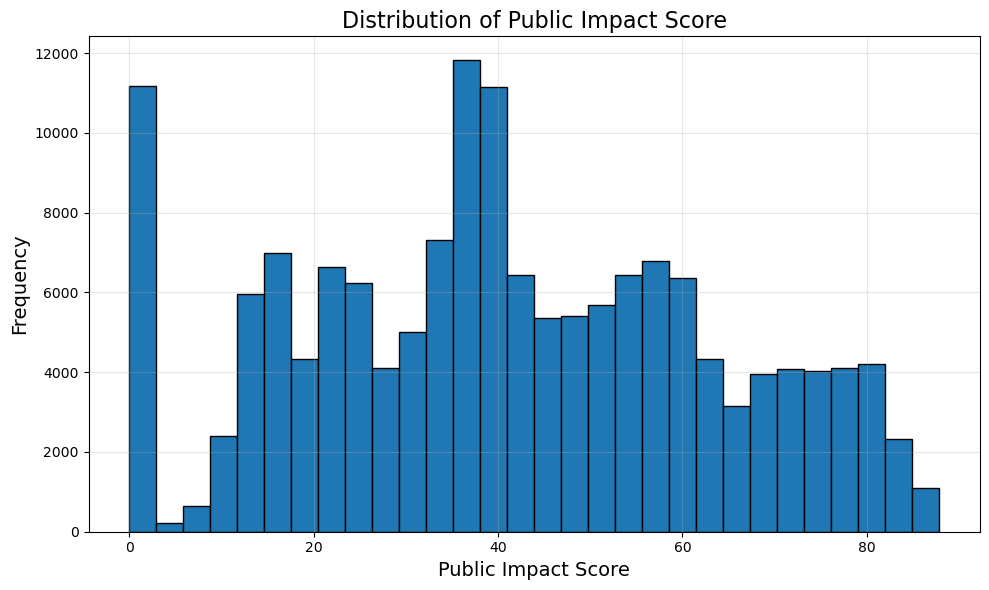

In [23]:
plt.figure(figsize=(10,6))

plt.hist(
    gdf_public_impact["public_impact"],
    bins=30,
    edgecolor="black"
)

plt.title("Distribution of Public Impact Score", fontsize=16)
plt.xlabel("Public Impact Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [24]:
print(gdf_public_impact["public_impact"].skew())

0.018318551062722992


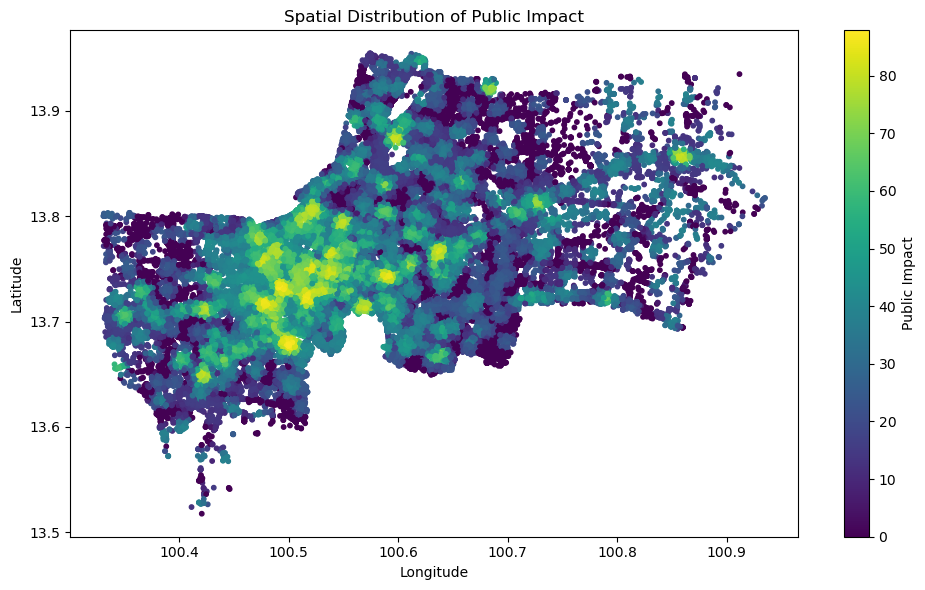

In [25]:
plt.figure(figsize=(10,6))

plt.scatter(
    gdf_public_impact["lng"],
    gdf_public_impact["lat"],
    c=gdf_public_impact["public_impact"],
    cmap="viridis",
    s=10
)

plt.colorbar(label="Public Impact")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Public Impact")
plt.tight_layout()
plt.show()

In [26]:
gdf_public_impact

,ticket_id,comment,district,timestamp,count_reopen,count_reopen_log,lng,lat,geometry,public_impact
0,2022-7ZTKJV,บริเวณนราธิวาส แยกถนนจันทน์ ใกล้สวนสาธารณะช่อ...,สาทร,2022-01-02 10:53:25.580723+00:00,0,0.0,100.53764,13.70716,POINT (100.53764 13.70716),45.271399
1,2022-E24G76,มอเตอร์ไซด์จอดบนทางเท้าเป็นประจำ ฝั่งตรงข้ามตล...,สาทร,2022-01-14 01:17:23.873811+00:00,0,0.0,100.52674,13.70950,POINT (100.52674 13.7095),39.153506
2,2022-C37YCA,มอเตอร์ไซด์จอดบนถนน ลดช่องจราจรทำให้การจราจรชะ...,สาทร,2022-01-14 01:18:57.194155+00:00,0,0.0,100.52678,13.70967,POINT (100.52678 13.70967),33.777447
3,2022-HB7Z8A,ทางเท้าช่วง จันทน์ 18/5 สภาพโอเค แต่ฝาท่อเก่าแ...,สาทร,2022-01-14 01:32:03.715912+00:00,0,0.0,100.53025,13.70566,POINT (100.53025 13.70566),46.621690
4,2022-8EW3HK,อยากให้สวนหลวง ร9 และ สวนสาธารณะอื่นๆ ใน กทม เ...,ประเวศ,2022-01-15 12:52:39.805944+00:00,0,0.0,100.65816,13.68814,POINT (100.65816 13.68814),0.000000
...,...,...,...,...,...,...,...,...,...,...
157758,PTLMHD,มีการตั้งเวที ร้องเพลง ส่งเสียงดัง โดยจุดเกิดเ...,วัฒนา,2022-12-31 20:03:10.221437+00:00,0,0.0,100.56189,13.73713,POINT (100.56189 13.73713),39.734012
157759,MHFY48,ซอย (ไม่ทราบชื่อ) ถนนมังกร เขตป้อมปราบศัตรูพ่า...,ป้อมปราบศัตรูพ่าย,2022-12-31 20:37:37.226395+00:00,0,0.0,100.51280,13.74480,POINT (100.5128 13.7448),71.718730
157760,NNFVLK,เปิดเพลงเสียงดังตั้งแต่ตอนเช้าจนถึงตีสี่ยังไม่...,ภาษีเจริญ,2022-12-31 20:52:02.074206+00:00,0,0.0,100.42785,13.68924,POINT (100.42785 13.68924),45.363848
157761,6LZVNJ,เสียงดังรบกวนรำคาน นอนไม่ได้ ผู้แจ้งไม่แน่ใจว่...,วัฒนา,2022-12-31 21:28:10.060293+00:00,0,0.0,100.56181,13.73713,POINT (100.56181 13.73713),39.692737


In [27]:
gdf_public_impact.drop(columns="geometry").to_csv(os.path.join(folder, "gdf_public_impact.csv"), index=False)
